In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv('train (1).csv')
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,11/15/2018 0:00,87862,422,1,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,11/15/2018 0:01,63410,467,3,1,1
2,70efdf2ec9b086079795c442636b55fb,11/15/2018 0:02,71748,259,2,1,0
3,8e296a067a37563370ded05f5a3bf3ec,11/15/2018 0:02,69209,244,3,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,11/15/2018 0:02,62873,473,3,0,0


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237609 entries, 0 to 237608
Data columns (total 7 columns):
impression_id      237609 non-null object
impression_time    237609 non-null object
user_id            237609 non-null int64
app_code           237609 non-null int64
os_version         237609 non-null int64
is_4G              237609 non-null int64
is_click           237609 non-null int64
dtypes: int64(5), object(2)
memory usage: 12.7+ MB


In [0]:
test = pd.read_csv('test (1).csv')
test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,12/13/2018 7:44,44754,127,3,1
1,caac14a5bf2ba283db7708bb34855760,12/13/2018 7:45,29656,44,3,0
2,13f10ba306a19ce7bec2f3cae507b698,12/13/2018 7:46,25234,296,3,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,12/13/2018 7:47,22988,207,3,1
4,bf5a572cca75f5fc67f4b14e58b11d70,12/13/2018 7:48,35431,242,3,1


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90675 entries, 0 to 90674
Data columns (total 6 columns):
impression_id      90675 non-null object
impression_time    90675 non-null datetime64[ns]
user_id            90675 non-null int64
app_code           90675 non-null int64
os_version         90675 non-null int64
is_4G              90675 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 4.2+ MB


In [0]:
test['impression_time'].unique().sum()

'12/13/2018 7:4412/13/2018 7:4512/13/2018 7:4612/13/2018 7:4712/13/2018 7:4812/13/2018 7:4912/13/2018 7:5012/13/2018 7:5112/13/2018 7:5212/13/2018 7:5312/13/2018 7:5412/13/2018 7:5512/12/2018 20:3912/12/2018 20:4012/12/2018 20:4112/12/2018 20:4212/12/2018 20:4312/12/2018 20:4412/12/2018 20:4512/12/2018 20:4612/12/2018 20:4712/12/2018 20:4812/12/2018 20:4912/12/2018 20:5012/12/2018 20:5112/12/2018 20:5212/12/2018 20:5312/12/2018 20:5412/12/2018 20:5512/12/2018 20:5612/12/2018 20:5712/12/2018 20:5812/12/2018 20:5912/12/2018 21:0012/12/2018 21:0112/12/2018 21:0212/12/2018 21:0312/12/2018 21:0412/12/2018 21:0512/12/2018 21:0612/12/2018 21:0712/12/2018 21:0812/12/2018 21:0912/12/2018 21:1012/12/2018 21:1112/12/2018 21:1212/12/2018 21:1312/12/2018 21:1412/12/2018 21:1512/12/2018 21:1612/12/2018 21:1712/12/2018 21:1812/12/2018 21:1912/12/2018 21:2012/12/2018 21:2112/12/2018 21:2212/12/2018 21:2312/12/2018 21:2412/12/2018 21:2512/12/2018 21:2612/12/2018 21:2712/12/2018 21:2812/12/2018 21:2912/

In [0]:
test['impression_time']=pd.to_datetime(test['impression_time'])

In [0]:
train['impression_time']=pd.to_datetime(train['impression_time'])

In [0]:
del test['impression_time']
del train['impression_time']

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize

X_train = train.drop("is_click", axis=1)
X_train = X_train.drop("impression_id", axis=1)
Y_train = train["is_click"].values
X_test = test.drop("impression_id", axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(np_scaled)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
X_train.shape, Y_train.shape, X_test.shape

((237609, 4), (237609,), (90675, 4))

In [0]:
#Linear Regression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)
acc_log = round(linreg.score(X_train, Y_train) * 100, 2)
acc_log

0.03

In [0]:
#Support Vector Machines (SVM)
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


95.43

In [0]:
#K-nearest (k-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

95.45

In [0]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

95.43

In [0]:
#Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

95.43

In [0]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

95.43

In [0]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

95.43

In [0]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

96.54

In [0]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

96.54

In [0]:
models = pd.DataFrame({
        'Model': ['Support Vector Machines', 'KNN', 'Linear Regression', 'Random Forest', 'Naive Bayes', 'Perceptron',
                  'Stochastic Gradient Descent', 'Linear SVC', 'Decision Tree'],
        'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,96.54
8,Decision Tree,96.54
1,KNN,95.45
0,Support Vector Machines,95.43
4,Naive Bayes,95.43
5,Perceptron,95.43
6,Stochastic Gradient Descent,95.43
7,Linear SVC,95.43
2,Linear Regression,0.03


In [0]:
Y_pred =np.array(Y_pred).tolist()
y_pred = np.array(Y_pred)

In [0]:
submission = pd.DataFrame({
        "impression_id": test["impression_id"],
        "is_click":y_pred
    })
submission.to_csv('./submission.csv', index=False)
print(submission.head(10))

                      impression_id  is_click
0  a9e7126a585a69a32bc7414e9d0c0ada         0
1  caac14a5bf2ba283db7708bb34855760         0
2  13f10ba306a19ce7bec2f3cae507b698         0
3  39c4b4dc0e9701b55a0a4f072008fb3f         0
4  bf5a572cca75f5fc67f4b14e58b11d70         0
5  ca09514449e304fee91456fb0918667a         0
6  b8b35cb0ae1719aa9f0ba7a9f3785687         0
7  33502d1e85818b9b3414c8c006c34e07         0
8  5314e09fb680c56b58eb5a3b5b7bce0c         0
9  e1a8a26385f49a5a7e04d34a5823bff3         0


In [0]:
from google.colab import files
files.download('submission.csv')

In [0]:
df=train

#**2nd**

In [0]:
numerical_features = df.select_dtypes(include=np.number)
categorical_features = df.select_dtypes(include=np.object)
print("numeric_features: ", numerical_features.shape, numerical_features.columns)
print("categorical_features: ", categorical_features.shape, categorical_features.columns)

numeric_features:  (237609, 5) Index(['user_id', 'app_code', 'os_version', 'is_4G', 'is_click'], dtype='object')
categorical_features:  (237609, 2) Index(['impression_id', 'impression_time'], dtype='object')


In [0]:
# skewness & kurtosis
pd.DataFrame({"Skewness": df.skew(), "Kurtosis": df.kurt()})

,Skewness,Kurtosis
user_id,-0.006088,-1.203398
app_code,-0.074578,-0.860599
os_version,-0.650277,-1.188974
is_4G,0.577412,-1.666609
is_click,4.350103,16.923538


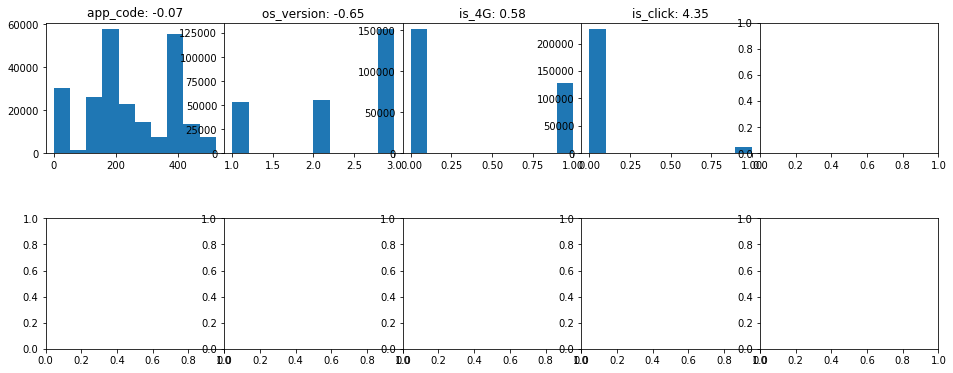

In [0]:
fig, axs = plt.subplots(2,5, figsize=(16, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >3],range(10)):
    axs[j].hist(numerical_features[i])
    axs[j].set_title(i+': '+str(np.round(numerical_features[i].skew(),2)))

In [0]:
numerical_features['is_click'].value_counts()

0    226747
1     10862
Name: is_click, dtype: int64

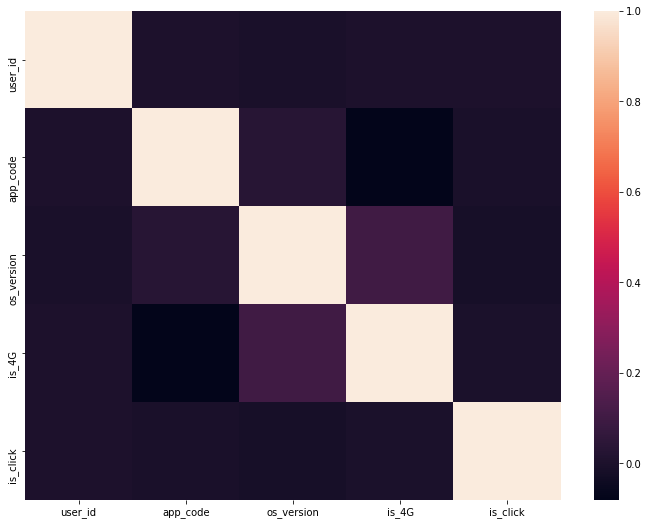

In [0]:
import seaborn as sns
# Correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(numerical_features.corr())

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
vif["features"] = numerical_features.columns
vif

NameError: ignored

In [0]:
df_train = pd.read_csv('train (1).csv')
df_test = pd.read_csv('test (1).csv')

df_train.shape, df_test.shape

((237609, 7), (90675, 6))

In [0]:

# Droping loan_id, dates & other categorical variables 
df1 = df.drop(['impression_id', 'impression_time'],axis=1)

In [0]:
# Recursive Feature Engineering (Dimensionality Reduction)

from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier

In [0]:
train = df1.iloc[:237609,:]
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['is_click'].values.ravel(), random_state=42, test_size=0.1)
X = xtrain
y = ytrain

In [0]:
#RFE (LogisticRegression)
import warnings
warnings.filterwarnings("ignore")
n_feat = [8,10,12,15,20]
for n in n_feat:
    model = LogisticRegression(solver='warn')
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
0.9540888855635778
0.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  10
0.9540888855635778
0.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  12
0.9540888855635778
0.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  15
0.9540888855635778
0.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  20
0.9540888855635778
0.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 



In [0]:
#RFE (DecisionTreeClassifier)

n_feat = [6,7,8,10,12,15]
for n in n_feat:
    model = DecisionTreeClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  6
1.0
1.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  7
1.0
1.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  8
1.0
1.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  10
1.0
1.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  12
1.0
1.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  15
1.0
1.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 



In [0]:
#RFE (AdaBoostClassifier)

n_feat = [8,10,12,15,20]
for n in n_feat:
    model = AdaBoostClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
1.0
1.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  10
1.0
1.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  12
1.0
1.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  15
1.0
1.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 

Top features:  20
1.0
1.0
['user_id' 'app_code' 'os_version' 'is_4G' 'is_click'] 



In [0]:
cols=['user_id', 'app_code', 'os_version', 'is_4G', 'is_click']
train = df1.iloc[:237609,:][cols]
test = df1.iloc[237609:,:][cols]

In [0]:
def simple_model(alg):

    # splitting data into training and validation set
    xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['is_click'].values.ravel(), random_state=42, test_size=0.2)
    model = alg
    model.fit(xtrain, ytrain) # training the model
#     prediction = model.predict_proba(xtest) # predicting on the validation set
#     prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#     prediction_int = prediction_int.astype(np.int)

    print("f1_score:",f1_score(ytest, model.predict(xtest))) # calculating f1 score
    print("Accuracy on train data:",model.score(xtrain,ytrain))
    print("Accuracy on test data:",model.score(xtest,ytest))

In [0]:
algs = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
algs_lst = ['LR','DTC','RFC','ETC','ABC','GBC']
for alg,l in zip(algs,algs_lst):
    print(l)
    simple_model(alg=alg)

LR
f1_score: 0.0
Accuracy on train data: 0.9541052255020069
Accuracy on test data: 0.9550103110138463
DTC
f1_score: 1.0
Accuracy on train data: 1.0
Accuracy on test data: 1.0
RFC
f1_score: 1.0
Accuracy on train data: 1.0
Accuracy on test data: 1.0
ETC
f1_score: 1.0
Accuracy on train data: 1.0
Accuracy on test data: 1.0
ABC
f1_score: 1.0
Accuracy on train data: 1.0
Accuracy on test data: 1.0
GBC
f1_score: 1.0
Accuracy on train data: 1.0
Accuracy on test data: 1.0


In [0]:
# Confusion Matrix (on AdaBoostClassifier)
from sklearn.metrics import confusion_matrix
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['is_click'].values.ravel(), random_state=42, test_size=0.2)
model = AdaBoostClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
confusion_matrix = confusion_matrix(ytest,ypred)
print(confusion_matrix)

[[45384     0]
 [    0  2138]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45384
           1       1.00      1.00      1.00      2138

    accuracy                           1.00     47522
   macro avg       1.00      1.00      1.00     47522
weighted avg       1.00      1.00      1.00     47522



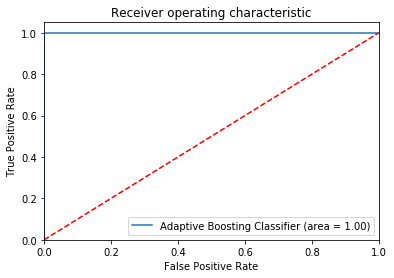

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(ytest, ypred)
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.figure()
plt.plot(fpr, tpr, label='Adaptive Boosting Classifier (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [0]:
# Cross Validation
from sklearn.model_selection import cross_val_score, KFold

xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['is_click'].values.ravel(), random_state=42, test_size=0.2)
kfold = KFold(n_splits = 10, random_state = 7)
modelCV = AdaBoostClassifier()
scoring = 'f1_macro'
results_train = cross_val_score(modelCV, xtrain, ytrain, scoring = scoring, cv = kfold)
results_test = cross_val_score(modelCV, xtest, ytest, scoring = scoring, cv = kfold)
print("10-fold cross validation average accuracy on train data: %.3f" % (results_train.mean()))
print("10-fold cross validation average accuracy on test data: %.3f" % (results_test.mean()))
print("results_train:",results_train)
print("results_test:",results_test)

10-fold cross validation average accuracy on train data: 1.000
10-fold cross validation average accuracy on test data: 1.000
results_train: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
results_test: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
model = AdaBoostClassifier(learning_rate=0.68,n_estimators=11)
# model = LogisticRegression(C= 0.001, class_weight= 'balanced', penalty= 'l1')
model.fit(train, ytrain) # training the model

prediction = model.predict_proba(test) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.445# if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

# prediction_int = model.predict(test)

df_sample_submission['is_click'] = list(prediction_int)
df_sample_submission['is_click'].value_counts()

ValueError: ignored